In [30]:
from pymutspec import draw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu, f_oneway

PATH_TO_12MUTSPEC = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/ms12syn_internal_iqtree.tsv'
PATH_TO_192MUTSPEC = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/ms192syn_internal_iqtree.tsv'
PATH_TO_METADATA = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/msMetaData.tsv'
PATH_TO_CODONTABLE = '/mnt/data/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/DescriptiveStat/codontable_midori_Blattodea.csv'

In [2]:
mutspec12 = pd.read_csv(PATH_TO_12MUTSPEC, sep='\t')
mutspec192 = pd.read_csv(PATH_TO_192MUTSPEC, sep='\t')
#PROBABLY NEED TO INVERT NUCLS

In [3]:
# inverts nucls for ms12, needs to be run only once. DEW IT!

a_spec = pd.concat([mutspec12[mutspec12['Mut'] == 'A>G'], mutspec12[mutspec12['Mut'] == 'A>C'], mutspec12[mutspec12['Mut'] == 'A>T']])
t_spec = pd.concat([mutspec12[mutspec12['Mut'] == 'T>G'], mutspec12[mutspec12['Mut'] == 'T>C'], mutspec12[mutspec12['Mut'] == 'T>A']])
g_spec = pd.concat([mutspec12[mutspec12['Mut'] == 'G>T'], mutspec12[mutspec12['Mut'] == 'G>C'], mutspec12[mutspec12['Mut'] == 'G>A']])
c_spec = pd.concat([mutspec12[mutspec12['Mut'] == 'C>T'], mutspec12[mutspec12['Mut'] == 'C>G'], mutspec12[mutspec12['Mut'] == 'C>A']])

a_spec.loc[a_spec['Mut'] == 'A>G', 'Mut'] = 'T>C'
a_spec.loc[a_spec['Mut'] == 'A>C', 'Mut'] = 'T>G'
a_spec.loc[a_spec['Mut'] == 'A>T', 'Mut'] = 'T>A'

t_spec.loc[t_spec['Mut'] == 'T>G', 'Mut'] = 'A>C'
t_spec.loc[t_spec['Mut'] == 'T>C', 'Mut'] = 'A>G'
t_spec.loc[t_spec['Mut'] == 'T>A', 'Mut'] = 'A>T'

g_spec.loc[g_spec['Mut'] == 'G>T', 'Mut'] = 'C>A'
g_spec.loc[g_spec['Mut'] == 'G>C', 'Mut'] = 'C>G'
g_spec.loc[g_spec['Mut'] == 'G>A', 'Mut'] = 'C>T'

c_spec.loc[c_spec['Mut'] == 'C>T', 'Mut'] = 'G>A'
c_spec.loc[c_spec['Mut'] == 'C>G', 'Mut'] = 'G>C'
c_spec.loc[c_spec['Mut'] == 'C>A', 'Mut'] = 'G>T'

mutspec12 = pd.concat([a_spec, t_spec, g_spec, c_spec]).sort_values(by=['Species', 'Mut'])


In [4]:
mutspec12 = mutspec12.dropna()
mutspec192 = mutspec192.dropna()

# ALL MUTSPECS

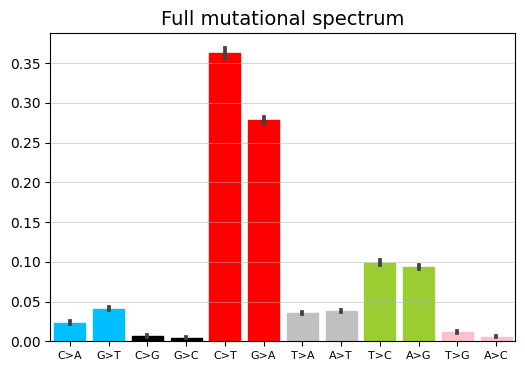

<AxesSubplot:title={'center':'Full mutational spectrum'}>

In [27]:
draw.plot_mutspec12(mutspec12, savepath='/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/figures/midori_all_insects_mutspec/mutspec12.pdf')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


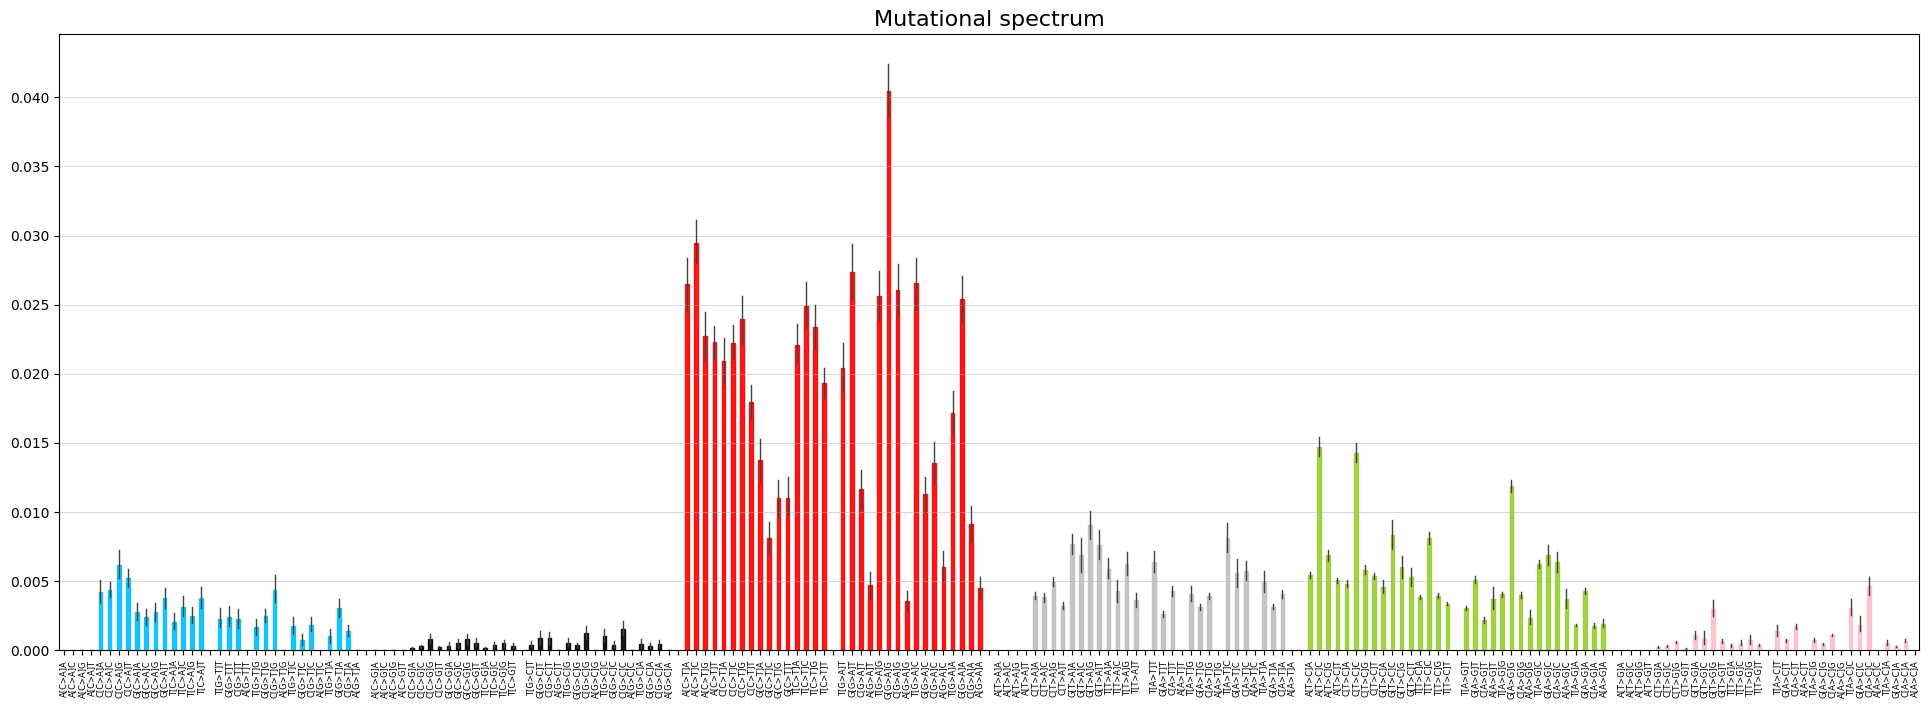

<AxesSubplot:title={'center':'Mutational spectrum'}>

In [28]:
#basicalt incorrect for now, as we don't invert substitution 
draw.plot_mutspec192(mutspec192, savepath='/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/figures/midori_all_insects_mutspec/mutspec192.pdf')

# COCK_TERM STUFF

In [5]:
metadata = pd.read_csv(PATH_TO_METADATA, sep='\t', index_col=0)
blattodea_meta = metadata.loc[metadata['Order'] == 'Blattodea_85823']

In [6]:
terms_meta = [] 
terms_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Rhinotermitidae_36985'])
terms_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Termitidae_46569'])
terms_meta = pd.concat(terms_meta)
terms_meta.reset_index(inplace=True)

cocks_meta = []
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Blattidae_6974'])
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Cryptocercidae_36982'])
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Ectobiidae_1049651'])
cocks_meta = pd.concat(cocks_meta)
cocks_meta.reset_index(inplace=True)

In [7]:
blattodea_codontable = pd.read_csv(PATH_TO_CODONTABLE, index_col=0)
blattodea_codontable.loc[blattodea_codontable["Taxonomy"] == "['Eukaryota_2759', 'Arthropoda_6656', 'Insecta_50557', 'Blattodea_85823', 'Cryptocercidae_36982']",
                                        "Workers"] = 'Sub'
blattodea_codontable['Species_name'] = list(map(lambda sp: f'{sp.split("_")[0]}_{sp.split("_")[1]}', blattodea_codontable['Species_name']))
blattodea_codontable['Workers'] = blattodea_codontable['Workers'].map({1.0 : 'Termites w/ workers', 0.0 : 'Termites w/o workers', "Sub" : 'Sub-social Cryptocercus'})
blattodea_codontable['Workers'] = blattodea_codontable['Workers'].fillna('Cockroaches')

term_codontable = []
for sp in terms_meta['Species']:
    term_codontable.append(blattodea_codontable.loc[blattodea_codontable['Species_name'] == sp])
term_codontable = pd.concat(term_codontable)

cocks_codontable = []
for sp in cocks_meta['Species']:
    cocks_codontable.append(blattodea_codontable.loc[blattodea_codontable['Species_name'] == sp])
cocks_codontable = pd.concat(cocks_codontable)

Text(0.5, 1.0, 'Nucleotide content of Blattodea')

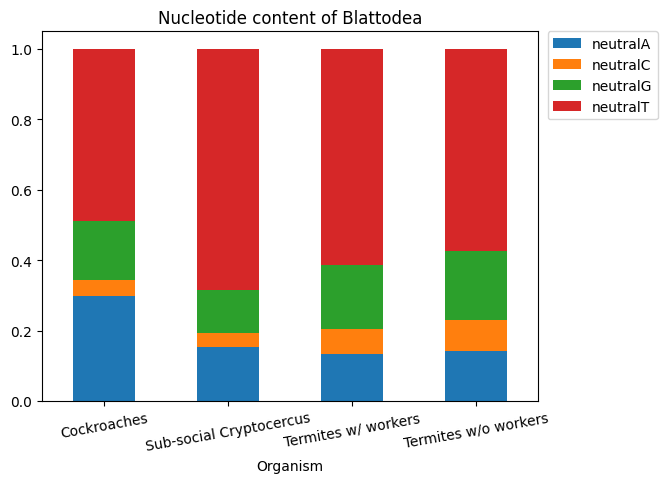

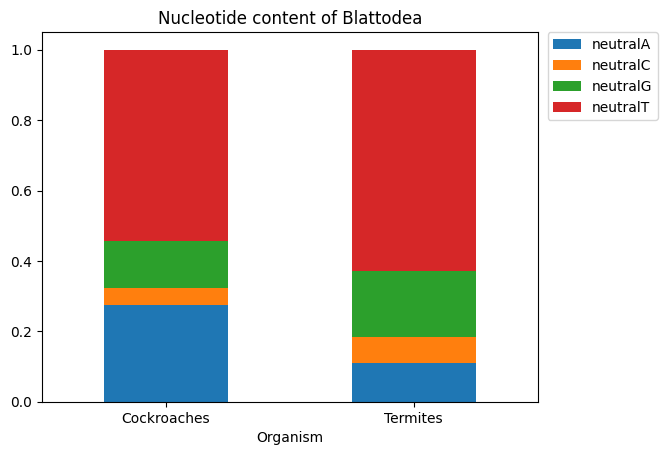

In [10]:
#!!!! NUCL VALUES ARE INVERTED FOR NOW
def get_codontable(codontable, organism):
    codontable = codontable.rename(columns={'neutralA' : 'neutralT', 'neutralT' : 'neutralA', 'neutralG' : 'neutralC', 'neutralC' : 'neutralG'})
    atgc_table = codontable.agg({'neutralA' : 'sum', 'neutralT' : 'sum', 'neutralG' : 'sum', 'neutralC' : 'sum'}).to_frame(name='count')
    atgc_table['Organism'] = organism 
    atgc_table['normalized_count'] = np.nan
    atgc_table.at['neutralA', 'normalized_count'] = atgc_table.at['neutralA', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralT', 'normalized_count'] = atgc_table.at['neutralT', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralG', 'normalized_count'] = atgc_table.at['neutralG', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralC', 'normalized_count'] = atgc_table.at['neutralC', 'count'] / atgc_table['count'].sum()
    
    return atgc_table

atgc_table = pd.concat([get_codontable(blattodea_codontable[blattodea_codontable['Workers'] == 'Cockroaches'], 'Cockroaches'), 
                        get_codontable(blattodea_codontable[blattodea_codontable['Workers'] == 'Sub-social Cryptocercus'], 'Sub-social Cryptocercus'),
                        get_codontable(blattodea_codontable[blattodea_codontable['Workers'] == 'Termites w/ workers'], 'Termites w/ workers'),
                        get_codontable(blattodea_codontable[blattodea_codontable['Workers'] == 'Termites w/o workers'], 'Termites w/o workers')])

pivoted = pd.pivot_table(atgc_table, columns=atgc_table.index, index=['Organism'])
pivoted = pivoted.drop(columns=['count'])
pivoted.columns = pivoted.columns.droplevel()

pivoted.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 10)
plt.title('Nucleotide content of Blattodea')

atgc_table_all = pd.concat([get_codontable(cocks_codontable, 'Cockroaches'), get_codontable(term_codontable, 'Termites')])
pivoted = pd.pivot_table(atgc_table_all, columns=atgc_table_all.index, index=['Organism'])
pivoted = pivoted.drop(columns=['count'])
pivoted.columns = pivoted.columns.droplevel()

pivoted.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 0)
plt.title('Nucleotide content of Blattodea')

In [25]:
mannwhitneyu(atgc_table_all[atgc_table_all['Organism'] == 'Cockroaches']['count'],atgc_table_all[atgc_table_all['Organism'] == 'Termites']['count'])

MannwhitneyuResult(statistic=4.0, pvalue=0.34285714285714286)

In [26]:
mannwhitneyu(atgc_table[atgc_table['Organism'] == 'Cockroaches']['count'],atgc_table[atgc_table['Organism'] == 'Termites w/ workers']['count'])

MannwhitneyuResult(statistic=1.0, pvalue=0.05714285714285714)

In [31]:
mannwhitneyu(atgc_table[atgc_table['Organism'] == 'Cockroaches']['count'],atgc_table[atgc_table['Organism'] == 'Termites w/o workers']['count'])

MannwhitneyuResult(statistic=6.0, pvalue=0.6857142857142857)

In [28]:
mannwhitneyu(atgc_table[atgc_table['Organism'] == 'Cockroaches']['count'],atgc_table[atgc_table['Organism'] == 'Sub-social Cryptocercus']['count'])

MannwhitneyuResult(statistic=13.0, pvalue=0.2)

In [32]:
#anova
f_oneway(atgc_table[atgc_table['Organism'] == 'Cockroaches']['count'],
         atgc_table[atgc_table['Organism'] == 'Sub-social Cryptocercus']['count'],
         atgc_table[atgc_table['Organism'] == 'Termites w/ workers']['count'],
         atgc_table[atgc_table['Organism'] == 'Termites w/o workers']['count'])

F_onewayResult(statistic=2.831019870686227, pvalue=0.08323095867773954)

In [57]:
cocks_mutspec12 = []
for sp in cocks_meta['Species']:
    cocks_mutspec12.append(mutspec12.loc[mutspec12['Species'] == sp])
cocks_mutspec12 = pd.concat(cocks_mutspec12)

terms_mutspec12 = []
for sp in terms_meta['Species']:
    terms_mutspec12.append(mutspec12.loc[mutspec12['Species'] == sp])
terms_mutspec12 = pd.concat(terms_mutspec12)

In [58]:
cocks_TC = cocks_mutspec12[cocks_mutspec12['Mut'] == 'T>C']
term_TC = terms_mutspec12[terms_mutspec12['Mut'] == 'T>C']
cocks_AG = cocks_mutspec12[cocks_mutspec12['Mut'] == 'A>G']
term_AG = terms_mutspec12[terms_mutspec12['Mut'] == 'A>G']

In [59]:
ttest_ind(term_TC['MutSpec'], cocks_TC['MutSpec'])

TtestResult(statistic=0.3452964699264137, pvalue=0.733009519519739, df=23.0)

In [60]:
ttest_ind(term_AG['MutSpec'], cocks_AG['MutSpec'])

TtestResult(statistic=2.9040285425263503, pvalue=0.007996516154258976, df=23.0)

In [61]:
mannwhitneyu(term_AG['MutSpec'], cocks_AG['MutSpec'])

MannwhitneyuResult(statistic=118.0, pvalue=0.0024260915794096574)

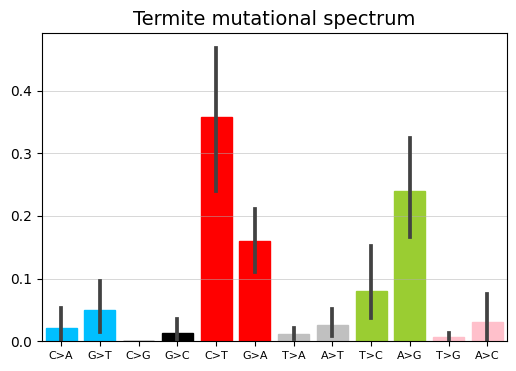

<AxesSubplot:title={'center':'Termite mutational spectrum'}>

In [62]:
draw.plot_mutspec12(terms_mutspec12, title='Termite mutational spectrum')

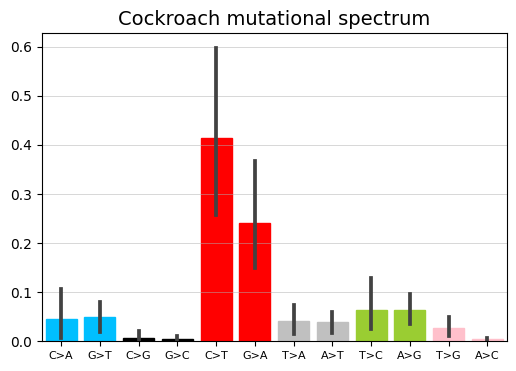

<AxesSubplot:title={'center':'Cockroach mutational spectrum'}>

In [63]:
draw.plot_mutspec12(cocks_mutspec12, title='Cockroach mutational spectrum')

# DIPTERA STUFF

In [83]:
PATH_TO_CODONTABLE = f'/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/DescriptiveStat/codontable_midori_Diptera.csv'
metadata = pd.read_csv(PATH_TO_METADATA, sep='\t', index_col=0)
diptera_meta = metadata.loc[metadata['Order'] == 'Diptera_7147']

In [84]:
nematocera_meta = [] 
families = ['Anisopodidae_52748','Bibionidae_52729','Cecidomyiidae_33406','Ceratopogonidae_41819','Chaoboridae_41811','Chironomidae_7149','Culicidae_7157','Keroplatidae_58254',
            'Limoniidae_43823','Mycetophilidae_29035','Psychodidae_7197','Ptychopteridae_79304','Sciaridae_7184','Simuliidae_7190','Tipulidae_41042']
for fam in families:
    nematocera_meta.append(diptera_meta.loc[diptera_meta['Family'] == fam])
nematocera_meta = pd.concat(nematocera_meta)
nematocera_meta.reset_index(inplace=True)

brachycera_meta = []
families = ['Agromyzidae_127399','Anthomyiidae_30062','Asilidae_50673','Aulacigastridae_286480','Calliphoridae_7371','Chamaemyiidae_189958','Chloropidae_29032',
            'Clusiidae_286472','Conopidae_115263','Dolichopodidae_92558','Drosophilidae_7214','Dryomyzidae_169441','Empididae_92557','Ephydridae_48991',
            'Fanniidae_27471','Fergusoninidae_156410','Glossinidae_7392','Heleomyzidae_219548','Hippoboscidae_81710','Hybotidae_1446258','Lauxaniidae_189929',
            'Milichiidae_305559','Muscidae_7366','Mydidae_50677','Nemestrinidae_92615','Nycteribiidae_81707','Oestridae_7387','Opomyzidae_286476','Phoridae_36164',
            'Piophilidae_28629','Pipunculidae_43835','Platypezidae_43827','Platystomatidae_28632','Polleniidae_54279','Rhagionidae_92609','Sarcophagidae_7381',
            'Scathophagidae_43756','Sciomyzidae_169447','Sepsidae_137503','Sphaeroceridae_114620','Stratiomyidae_34687','Streblidae_81697','Syrphidae_34680',
            'Tachinidae_27474','Tephritidae_7211','Tabanidae_7205','Xylophagaidae_92613']
for fam in families:
    brachycera_meta.append(diptera_meta.loc[diptera_meta['Family'] == fam])
brachycera_meta = pd.concat(brachycera_meta)
brachycera_meta.reset_index(inplace=True)


In [85]:
diptera_codontable = pd.read_csv(PATH_TO_CODONTABLE, index_col=0)
diptera_codontable['Species_name'] = list(map(lambda sp: f'{sp.split("_")[0]}_{sp.split("_")[1]}', diptera_codontable['Species_name']))

nematocera_codontable = []
for sp in nematocera_meta['Species']:
    nematocera_codontable.append(diptera_codontable.loc[diptera_codontable['Species_name'] == sp])
nematocera_codontable = pd.concat(nematocera_codontable)

brachycera_codontable = []
for sp in brachycera_meta['Species']:
    brachycera_codontable.append(diptera_codontable.loc[diptera_codontable['Species_name'] == sp])
brachycera_codontable = pd.concat(brachycera_codontable)

Text(0.5, 1.0, 'Nucleotide content of Diptera')

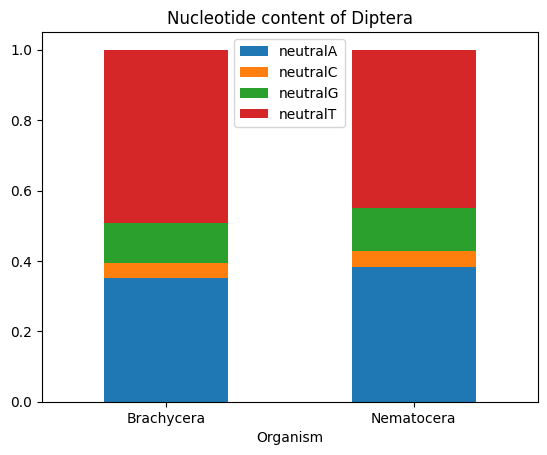

In [96]:
#!!!! NUCL VALUES ARE INVERTED FOR NOW
def get_codontable(codontable, organism):
    codontable = codontable.rename(columns={'neutralA' : 'neutralT', 'neutralT' : 'neutralA', 'neutralG' : 'neutralC', 'neutralC' : 'neutralG'})
    atgc_table = codontable.agg({'neutralA' : 'sum', 'neutralT' : 'sum', 'neutralG' : 'sum', 'neutralC' : 'sum'}).to_frame(name='count')
    atgc_table['Organism'] = organism
    atgc_table['normalized_count'] = np.nan
    atgc_table.at['neutralA', 'normalized_count'] = atgc_table.at['neutralA', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralT', 'normalized_count'] = atgc_table.at['neutralT', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralG', 'normalized_count'] = atgc_table.at['neutralG', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralC', 'normalized_count'] = atgc_table.at['neutralC', 'count'] / atgc_table['count'].sum()
    return atgc_table

atgc_table = pd.concat([get_codontable(nematocera_codontable, 'Nematocera'), get_codontable(brachycera_codontable, 'Brachycera')])

pivoted = pd.pivot_table(atgc_table, columns=atgc_table.index, index=['Organism'])
pivoted = pivoted.drop(columns=['count'])
pivoted.columns = pivoted.columns.droplevel()

pivoted.plot(kind='bar', stacked=True)
plt.legend(loc='upper center')
plt.xticks(rotation = 0)
plt.title('Nucleotide content of Diptera')

In [33]:
nematocera_mutspec12 = []
for sp in nematocera_meta['Species']:
    nematocera_mutspec12.append(mutspec12.loc[mutspec12['Species'] == sp])
nematocera_mutspec12 = pd.concat(nematocera_mutspec12)

brachycera_mutspec12 = []
for sp in brachycera_meta['Species']:
    brachycera_mutspec12.append(mutspec12.loc[mutspec12['Species'] == sp])
brachycera_mutspec12 = pd.concat(brachycera_mutspec12)

In [34]:
nematocera_TC = nematocera_mutspec12[nematocera_mutspec12['Mut'] == 'T>C']
brachycera_TC = brachycera_mutspec12[brachycera_mutspec12['Mut'] == 'T>C']
nematocera_AG = nematocera_mutspec12[nematocera_mutspec12['Mut'] == 'A>G']
brachycera_AG = brachycera_mutspec12[brachycera_mutspec12['Mut'] == 'A>G']

In [36]:
mannwhitneyu(nematocera_AG['MutSpec'], brachycera_AG['MutSpec'])

MannwhitneyuResult(statistic=632585.0, pvalue=0.0008521965135437247)

In [39]:
mannwhitneyu(nematocera_TC['MutSpec'], brachycera_TC['MutSpec'])

MannwhitneyuResult(statistic=757653.0, pvalue=1.726344379346782e-05)

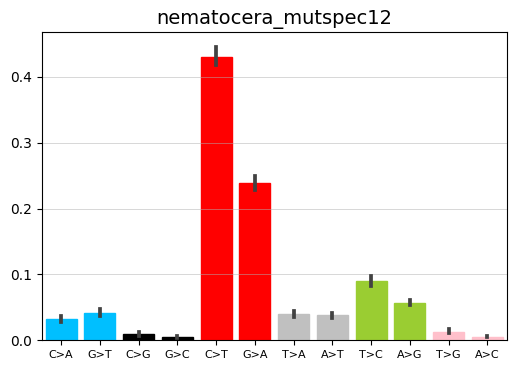

<AxesSubplot:title={'center':'nematocera_mutspec12'}>

In [37]:
draw.plot_mutspec12(nematocera_mutspec12, title='nematocera_mutspec12')

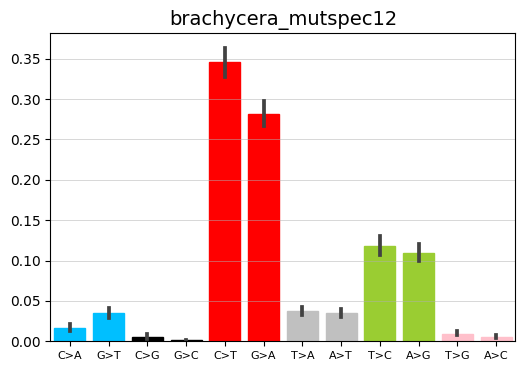

<AxesSubplot:title={'center':'brachycera_mutspec12'}>

In [38]:
draw.plot_mutspec12(brachycera_mutspec12, title='brachycera_mutspec12')

# Hymenoptera stuff

In [ ]:
PATH_TO_CODONTABLE = f'/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/DescriptiveStat/codontable_midori_Hymenoptera.csv'
metadata = pd.read_csv(PATH_TO_METADATA, sep='\t', index_col=0)
Hymenoptera_meta = metadata.loc[metadata['Order'] == 'Hymenoptera_7399']

In [12]:
# WIP, separate hymenoptera families
terms_meta = [] 
terms_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Rhinotermitidae_36985'])
terms_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Termitidae_46569'])
terms_meta = pd.concat(terms_meta)
terms_meta.reset_index(inplace=True)

cocks_meta = []
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Blattidae_6974'])
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Cryptocercidae_36982'])
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Ectobiidae_1049651'])
cocks_meta = pd.concat(cocks_meta)
cocks_meta.reset_index(inplace=True)

NameError: name 'blattodea_meta' is not defined

In [13]:
hymenoptera_codontable = pd.read_csv(PATH_TO_CODONTABLE, index_col=0)
hymenoptera_codontable['Species_name'] = list(map(lambda sp: f'{sp.split("_")[0]}_{sp.split("_")[1]}', diptera_codontable['Species_name']))

# WIP, separate hymenoptera families
term_codontable = []
for sp in terms_meta['Species']:
    term_codontable.append(blattodea_codontable.loc[blattodea_codontable['Species_name'] == sp])
term_codontable = pd.concat(term_codontable)

cocks_codontable = []
for sp in cocks_meta['Species']:
    cocks_codontable.append(blattodea_codontable.loc[blattodea_codontable['Species_name'] == sp])
cocks_codontable = pd.concat(cocks_codontable)

TypeError: list indices must be integers or slices, not str

Text(0.5, 1.0, 'Nucleotide content of Blattodea')

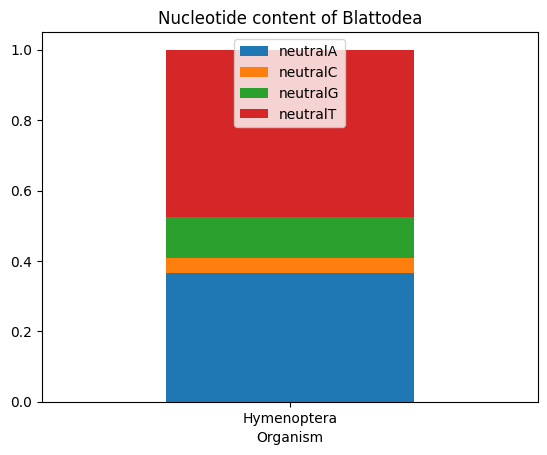

In [14]:
#!!!! NUCL VALUES ARE INVERTED FOR NOW
def get_codontable(codontable, organism):
    codontable = codontable.rename(columns={'neutralA' : 'neutralT', 'neutralT' : 'neutralA', 'neutralG' : 'neutralC', 'neutralC' : 'neutralG'})
    atgc_table = codontable.agg({'neutralA' : 'sum', 'neutralT' : 'sum', 'neutralG' : 'sum', 'neutralC' : 'sum'}).to_frame(name='count')
    atgc_table['Organism'] = organism
    atgc_table['normalized_count'] = np.nan
    atgc_table.at['neutralA', 'normalized_count'] = atgc_table.at['neutralA', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralT', 'normalized_count'] = atgc_table.at['neutralT', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralG', 'normalized_count'] = atgc_table.at['neutralG', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralC', 'normalized_count'] = atgc_table.at['neutralC', 'count'] / atgc_table['count'].sum()
    return atgc_table

atgc_table = get_codontable(hymenoptera_codontable, 'Hymenoptera')

pivoted = pd.pivot_table(atgc_table, columns=atgc_table.index, index=['Organism'])
pivoted = pivoted.drop(columns=['count'])
pivoted.columns = pivoted.columns.droplevel()

pivoted.plot(kind='bar', stacked=True)
plt.legend(loc='upper center')
plt.xticks(rotation = 0)
plt.title('Nucleotide content of Blattodea')